In [28]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from make_dataset import renamed_columns_en, process_raw, clean_na, make_dataset, abbreviation
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [29]:
#bring in the six packs
df_train = pd.read_csv('/Users/ameyadange/Documents/GitHub/markov_weather/archive/north.csv')

In [30]:
abs = abbreviation
print(abs)

['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct', 'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt']


In [31]:
#changing column names
if len(abs)<27:
    abs.insert(0, "index")
df_train.columns = abs
print(abs)

['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct', 'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt']


In [32]:
num_rows = len(df_train['tmax'])

In [33]:
df_train.columns

Index(['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct',
       'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt'],
      dtype='object')

In [34]:
df_train.replace(-9999, np.nan, inplace=True)

In [35]:
new_df = pd.DataFrame({col: [] for col in abbreviation})
new_df.columns

Index(['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct',
       'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt'],
      dtype='object')

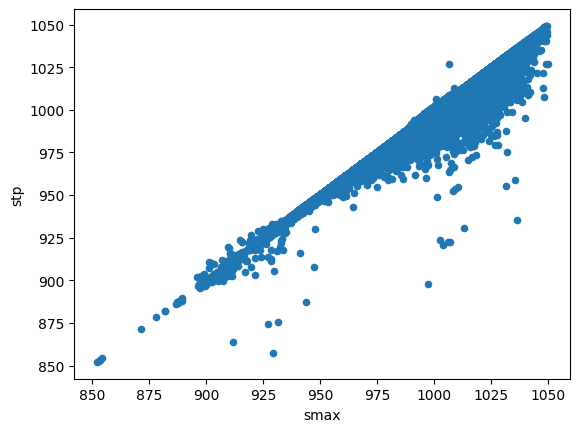

In [36]:
#Atmospheric pressure vs pmax   (Remove outliers)
var = 'smax'
data = pd.concat([df_train['stp'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='stp');

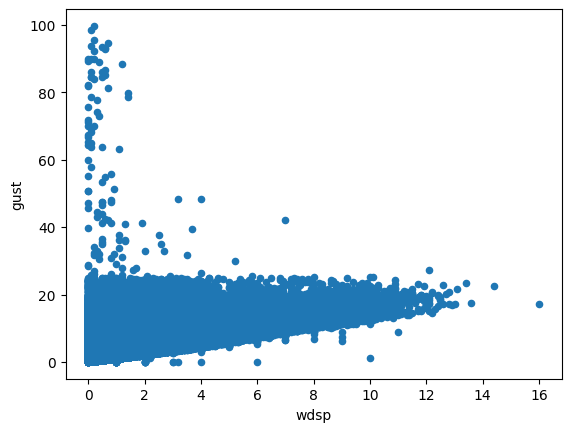

In [37]:
#wind speed vs gust speed (remove outliers)

var = 'wdsp'
data = pd.concat([df_train['gust'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='gust');

In [38]:
gust_out_liers = []
for i in range(num_rows):
    x = df_train['wdsp'][i]
    y = df_train['gust'][i]
    if y > 30:
        gust_out_liers.append(i)
    elif y < x - 3:
       gust_out_liers.append(i) 

new_df = df_train.drop(gust_out_liers)
new_df = new_df.reset_index(drop=True)


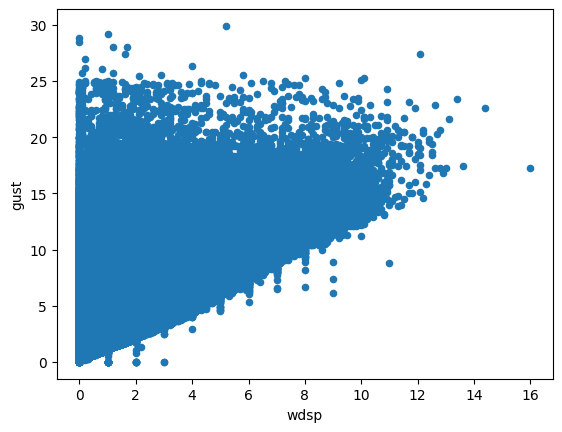

In [39]:
#wind speed vs gust speed (remove outliers)

var = 'wdsp'
data = pd.concat([new_df['gust'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='gust');

In [40]:
stp_smax_out_liers = []
num_rows = len(new_df['tmax'])
for i in range(num_rows):
    x = new_df['smax'][i]
    y = new_df['stp'][i]
    if y < x - 70:
        stp_smax_out_liers.append(i)

new_df = new_df.drop(stp_smax_out_liers)
new_df = new_df.reset_index(drop=True)

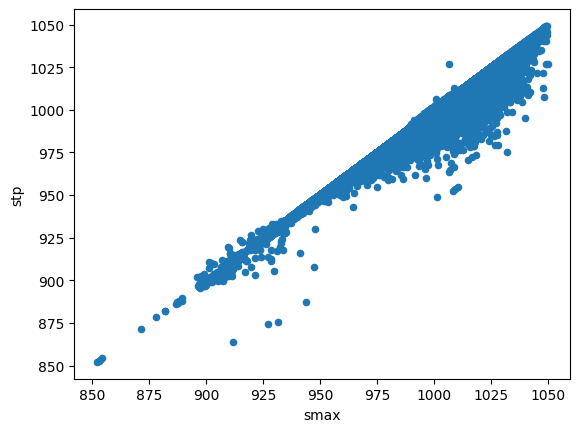

In [41]:
#Atmospheric pressure vs pmax   (Remove outliers)
var = 'smax'
data = pd.concat([new_df['stp'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='stp');

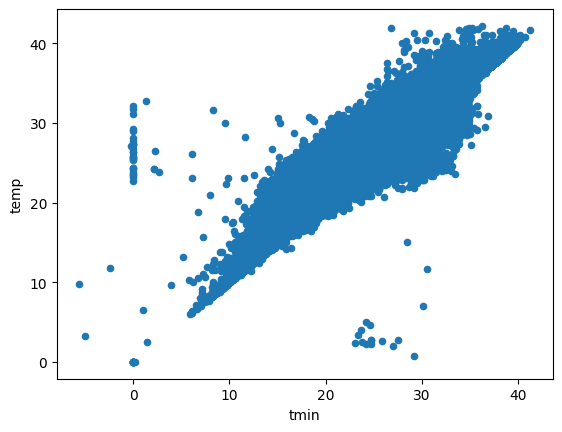

In [42]:
#temp vs tmin   (Remove outliers)
var = 'tmin'
data = pd.concat([new_df['temp'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='temp');

In [43]:
temp_tmin_out_liers = []
num_rows = len(new_df['tmax'])
for i in range(num_rows):
    y = new_df['temp'][i]
    x = new_df['tmin'][i]
    if y > x + 15:
        temp_tmin_out_liers.append(i)
    elif y < x - 10:
        temp_tmin_out_liers.append(i)

new_df = new_df.drop(temp_tmin_out_liers)
new_df = new_df.reset_index(drop=True)

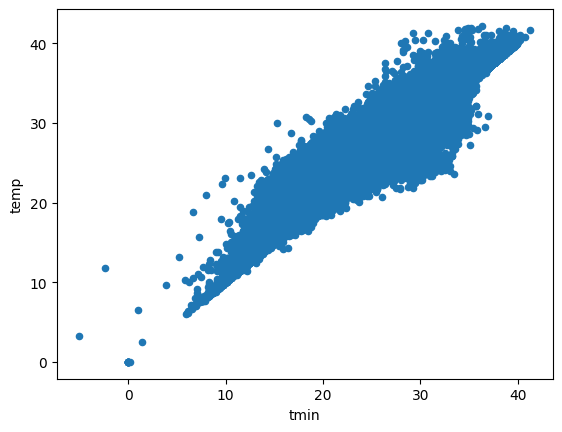

In [44]:
#temp vs tmin   (Remove outliers)
var = 'tmin'
data = pd.concat([new_df['temp'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='temp');

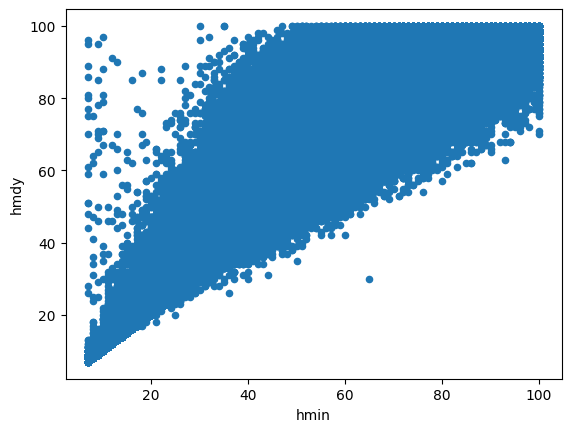

In [45]:
#hmdy vs hmin   (Remove outliers)
var = 'hmin'
data = pd.concat([new_df['hmdy'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='hmdy');

In [46]:
hmdy_hmin_out_liers = []
num_rows = len(new_df['tmax'])
for i in range(num_rows):
    y = new_df['hmdy'][i]
    x = new_df['hmin'][i]
    if y > 4*x + 12:
        hmdy_hmin_out_liers.append(i)
    elif y < x - 20:
        hmdy_hmin_out_liers.append(i)

new_df = new_df.drop(hmdy_hmin_out_liers)
new_df = new_df.reset_index(drop=True)

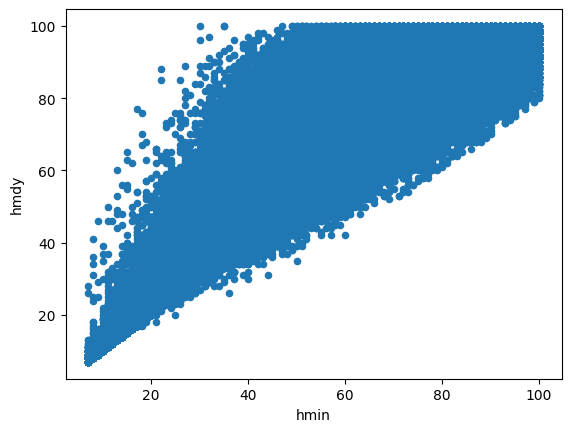

In [47]:
#hmdy vs hmin   (Remove outliers)
var = 'hmin'
data = pd.concat([new_df['hmdy'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='hmdy');

In [48]:
missing_percentages = new_df.isna().mean() * 100
print(missing_percentages)

index     0.000000
date      0.000000
hour      0.000000
prcp     23.691554
stp      18.961020
smax     19.040237
smin     19.039987
gbrd     54.107338
temp     18.484247
dewp     20.332352
tmax     18.569590
tmin     18.568053
dmax     20.422640
dmin     20.444030
hmax     20.345782
hmin     20.397891
hmdy     20.334533
wdct     22.015290
gust     21.572955
wdsp     21.423063
regi      0.000000
prov      0.000000
wsnm      0.000000
inme      0.000000
lat       0.000000
lon       0.000000
elvt      3.263242
dtype: float64


In [49]:
df_mean =  new_df.drop(['index', 'hour', 'gbrd', 'smax', 'smin', 'tmin', 'tmax', 'dmax', 'dmin', 'hmax', 'hmin', 'dewp', 'gust'], axis=1)
#df_mean =  df_mean.groupby(['date', 'inme', 'regi', 'prov', 'wsnm', 'lat', 'lon', 'elvt'])[['prcp', 'temp', 'hmdy', 'wdct', 'wdsp', 'stp']].mean()
df_mean = df_mean.groupby(['date', 'inme', 'regi', 'prov', 'wsnm', 'lat', 'lon', 'elvt']).agg({'prcp': 'mean', 'stp': 'mean', 'temp': 'mean', 'hmdy': 'mean', 'wdct': 'mean', 'wdsp': 'mean'}).reset_index()

In [50]:
missing_percentages = df_mean.isna().mean() * 100
print(missing_percentages)

date     0.000000
inme     0.000000
regi     0.000000
prov     0.000000
wsnm     0.000000
lat      0.000000
lon      0.000000
elvt     0.000000
prcp    19.169586
stp     13.706709
temp    13.209762
hmdy    14.515247
wdct    16.989343
wdsp    16.390995
dtype: float64


In [51]:
df_sorted = df_mean.sort_values(by=['inme', 'date'])

In [52]:
df_interpolated = df_sorted.interpolate()
missing_percentages = df_interpolated.isna().mean() * 100
print(missing_percentages)

date    0.0
inme    0.0
regi    0.0
prov    0.0
wsnm    0.0
lat     0.0
lon     0.0
elvt    0.0
prcp    0.0
stp     0.0
temp    0.0
hmdy    0.0
wdct    0.0
wdsp    0.0
dtype: float64


In [53]:
df_interpolated.to_csv('/Users/ameyadange/Documents/GitHub/markov_weather/archive/north_new.csv', index=False)

In [54]:
print("hi")

hi
